# Titanic Dataset

In [99]:
import pandas as pd

# Read CSV file
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
accuracy_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

Show The Dataset first

In [22]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


There are a lot of column in the dataset, such as : 

* PassengerId: Passenger ID
* Pclass: Socio-economic class (1, 2, 3)
* Name: Passenger's name
* Sex: Gender
* Age: Age
* SibSp: Number of siblings or spouse traveling with the passenger
* Parch: Number of parents or children traveling with the passenger
* Fare: Ticket fare paid
* Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* Survived: Target column indicating whether the passenger survived (1) or not (0)

After show the data we need to see how many missing data each column to lead us where we heading next step

In [23]:
# Show total data that have NaN values
missing_values = train_df.isnull().sum()
print("Missing data per Column:")
print(missing_values[missing_values > 0])

Missing data per Column:
Age         177
Cabin       687
Embarked      2
dtype: int64


So there are :

1. 177 missing data in age column
2. 687 missing data in cabin column
3. 2 missing data in embarked column

In [24]:
# Make Column based on column we need
new_df = train_df[['Survived', 'Pclass', 'Sex', 'Age']]

# Show Dataframe
print(new_df)

     Survived  Pclass     Sex   Age
0           0       3    male  22.0
1           1       1  female  38.0
2           1       3  female  26.0
3           1       1  female  35.0
4           0       3    male  35.0
..        ...     ...     ...   ...
886         0       2    male  27.0
887         1       1  female  19.0
888         0       3  female   NaN
889         1       1    male  26.0
890         0       3    male  32.0

[891 rows x 4 columns]


We can add missing age by mean, or median, but it doest have accurate results.So, in this project I will remove the data that have null age, and I will use remaining data to make model that can make prediction based on survived, pclass, sex, age and I will fill the missing age based on prediction that I make.

I Split the data that doest have missing value as training data for predict the age

In [29]:
#Remove data with missing age
new_df_train =new_df.dropna(subset=['Age'])
print(new_df_train)

     Survived  Pclass     Sex   Age
0           0       3    male  22.0
1           1       1  female  38.0
2           1       3  female  26.0
3           1       1  female  35.0
4           0       3    male  35.0
..        ...     ...     ...   ...
885         0       3  female  39.0
886         0       2    male  27.0
887         1       1  female  19.0
889         1       1    male  26.0
890         0       3    male  32.0

[714 rows x 4 columns]


This is data that I make for predict and fill the age

In [32]:
new_df_test = new_df[new_df['Age'].isna()]
print(new_df_test)

     Survived  Pclass     Sex  Age
5           0       3    male  NaN
17          1       2    male  NaN
19          1       3  female  NaN
26          0       3    male  NaN
28          1       3  female  NaN
..        ...     ...     ...  ...
859         0       3    male  NaN
863         0       3  female  NaN
868         0       3    male  NaN
878         0       3    male  NaN
888         0       3  female  NaN

[177 rows x 4 columns]


I use linear regression to predict the age based on survived, Pclass, Sex

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Splitting features (X) and target (Y) for training data
X_train = new_df_train[['Survived', 'Pclass', 'Sex']]
Y_train = new_df_train['Age']

# Converting 'Sex' to numerical values (0 = male, 1 = female)
label_encoder = LabelEncoder()
X_train.loc[:, 'Sex'] = label_encoder.fit_transform(X_train['Sex'])  # Using .loc to avoid warnings

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

After making the model I predict the age based on test data and this is the result

In [91]:
# Splitting the features (X) for data where Age is missing
X_test = new_df_test[['Survived', 'Pclass', 'Sex']]

# Converting 'Sex' to numerical values using the same label_encoder
X_test.loc[:, 'Sex'] = label_encoder.transform(X_test['Sex'])

# Predicting age for the data with missing Age
predicted_age = model.predict(X_test)

# Rounding the predicted values to integers
predicted_age = predicted_age.round().astype(int)

# Adding the predicted values to the new_df_test['Age'] column
new_df_test.loc[:, 'Age'] = predicted_age

# Displaying the result with the filled-in Age
print(new_df_test)

     Survived  Pclass     Sex   Age
5           0       3    male  27.0
17          1       2    male  28.0
19          1       3  female  19.0
26          0       3    male  27.0
28          1       3  female  19.0
..        ...     ...     ...   ...
859         0       3    male  27.0
863         0       3  female  25.0
868         0       3    male  27.0
878         0       3    male  27.0
888         0       3  female  25.0

[177 rows x 4 columns]


We get all the age and the next process is we figured out correlation between each label

In [94]:
# Merging the data with the filled-in Age into the main DataFrame
new_df = pd.concat([new_df_train, new_df_test])
new_df = new_df.sort_index()
# Displaying the data with the filled-in Age
print(new_df)

     Survived  Pclass     Sex   Age
0           0       3    male  22.0
1           1       1  female  38.0
2           1       3  female  26.0
3           1       1  female  35.0
4           0       3    male  35.0
..        ...     ...     ...   ...
886         0       2    male  27.0
887         1       1  female  19.0
888         0       3  female  25.0
889         1       1    male  26.0
890         0       3    male  32.0

[891 rows x 4 columns]


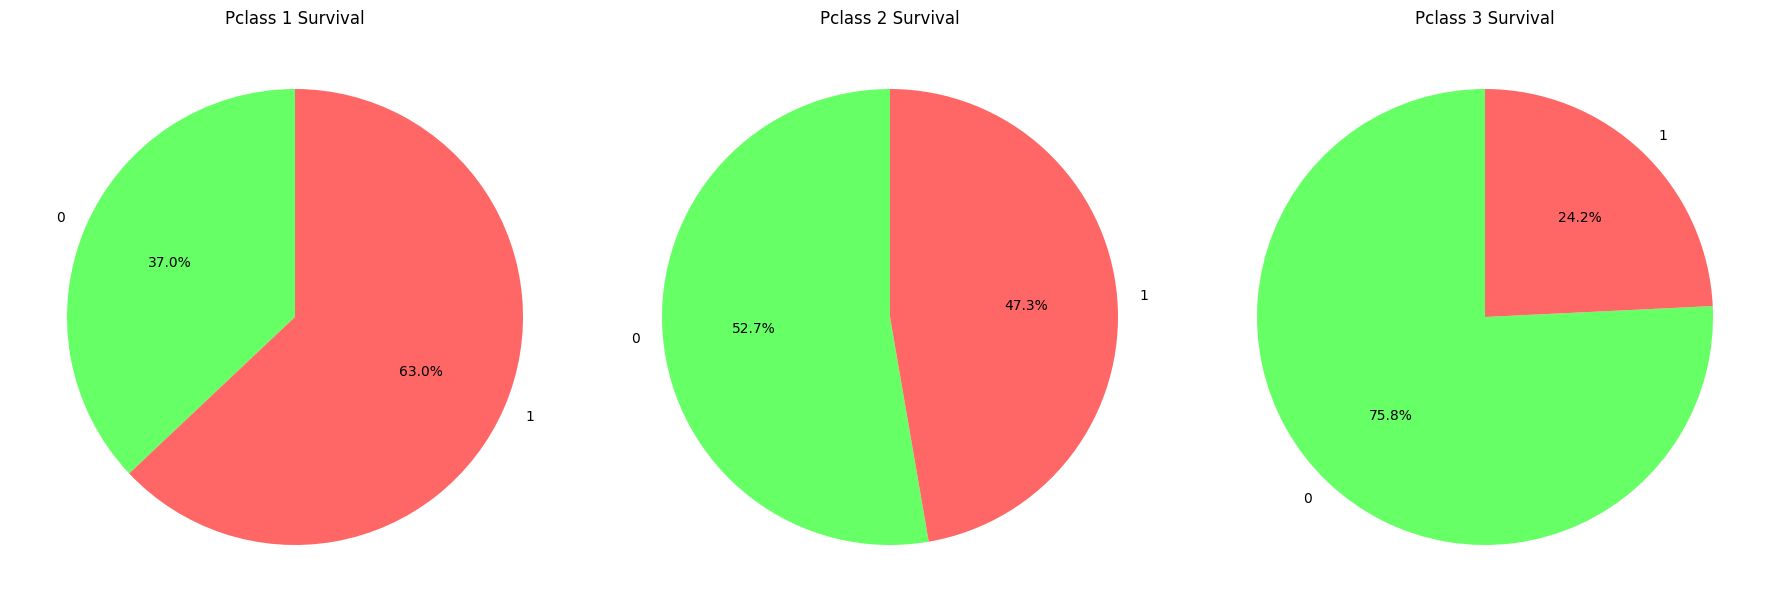

In [62]:
import matplotlib.pyplot as plt

# Grouping by 'Pclass' and calculating the survival rate for each class
pclass_survival = new_df.groupby('Pclass')['Survived'].value_counts().unstack(fill_value=0)

# Plotting the pie charts for each class
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pclass 1
axes[0].pie(pclass_survival.loc[1], labels=pclass_survival.columns, autopct='%1.1f%%', startangle=90, colors=['#66ff66', '#ff6666'])
axes[0].set_title('Pclass 1 Survival')

# Pclass 2
axes[1].pie(pclass_survival.loc[2], labels=pclass_survival.columns, autopct='%1.1f%%', startangle=90, colors=['#66ff66', '#ff6666'])
axes[1].set_title('Pclass 2 Survival')

# Pclass 3
axes[2].pie(pclass_survival.loc[3], labels=pclass_survival.columns, autopct='%1.1f%%', startangle=90, colors=['#66ff66', '#ff6666'])
axes[2].set_title('Pclass 3 Survival')

# Display the pie charts
plt.tight_layout()
plt.show()


Class 1 (Premium Class) Have higher chances rather than Clas 2 (Middle Class) that has almost 50-50 chances to survived, and Class 3 (Low Class) only have 25% chances to survived.

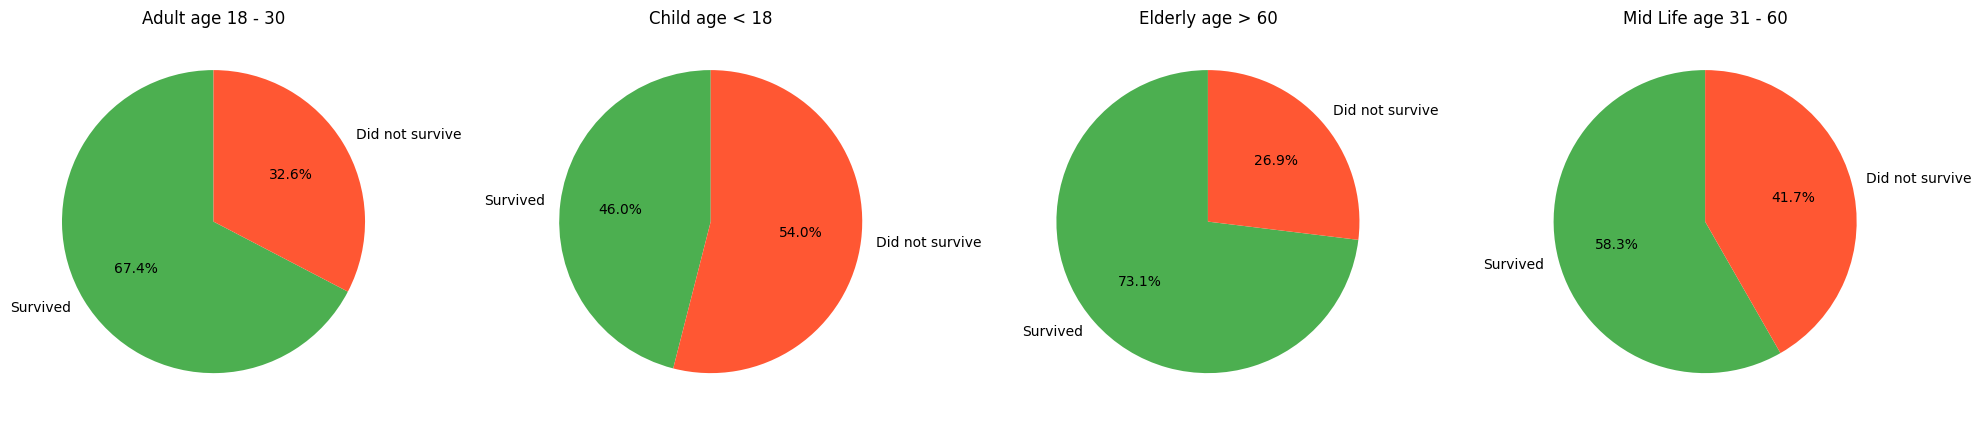

In [82]:
import matplotlib.pyplot as plt

# Categorizing age into Child, Adult, Mid Life, and Elderly
def categorize_age(age):
    if age < 18:
        return 'Child age < 18'
    elif 18 <= age < 31:
        return 'Adult age 18 - 30'
    elif 31 <= age < 60:
        return 'Mid Life age 31 - 60'
    else:
        return 'Elderly age > 60'

# Apply the categorize_age function to create a new column
new_df['Age_Category'] = new_df['Age'].apply(categorize_age)

# Get the count of survivors and non-survivors by age category
age_category_survival_count = new_df.groupby(['Age_Category', 'Survived']).size().unstack(fill_value=0)

# Plotting pie charts for each age category
age_categories = age_category_survival_count.index

# Create a subplot with 1 row and 4 columns (for 4 categories)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Loop through each age category and plot pie chart
for i, category in enumerate(age_categories):
    # Extract the data for the current age category
    survival_counts = age_category_survival_count.loc[category]
    
    # Plot the pie chart
    axes[i].pie(survival_counts, labels=['Survived', 'Did not survive'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5733'])
    axes[i].set_title(f'{category}')

# Display the plots
plt.tight_layout()
plt.show()


In [89]:
new_test_df = test_df[['PassengerId','Pclass', 'Sex', 'Age']]
new_test_df.loc[:, 'Age'] = new_test_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))
new_test_df.loc[:, 'Age'] = new_test_df['Age'].round().astype(int)
print(new_test_df)

     PassengerId  Pclass     Sex   Age
0            892       3    male  34.0
1            893       3  female  47.0
2            894       2    male  62.0
3            895       3    male  27.0
4            896       3  female  22.0
..           ...     ...     ...   ...
413         1305       3    male  24.0
414         1306       1  female  39.0
415         1307       3    male  38.0
416         1308       3    male  24.0
417         1309       3    male  24.0

[418 rows x 4 columns]


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Splitting features (X) and target (Y) for training data
X_train = new_df_train[['Pclass', 'Sex', 'Age']]  #Features
Y_train = new_df_train['Survived']  # Target is 'Survived'

# Converting 'Sex' to numerical values (0 = male, 1 = female)
label_encoder = LabelEncoder()
X_train.loc[:, 'Sex'] = label_encoder.fit_transform(X_train['Sex'])  # Using .loc to avoid warnings

# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [98]:
# Splitting the features (X) for data where Age is missing
X_test = new_test_df[['Pclass', 'Sex', 'Age']]

# Converting 'Sex' to numerical values using the same label_encoder
X_test.loc[:, 'Sex'] = label_encoder.transform(X_test['Sex'])

# Predicting survival (0 or 1) for the data
predicted_survival = model.predict(X_test)

# Adding the predicted survival values to the new_test_df['Survived'] column
new_test_df.loc[:, 'Survived'] = predicted_survival.round().astype(int)

# Displaying the result with the predicted 'Survived' values
print(new_test_df.head(10))


   PassengerId  Pclass     Sex   Age  Survived
0          892       3    male  34.0         0
1          893       3  female  47.0         0
2          894       2    male  62.0         0
3          895       3    male  27.0         0
4          896       3  female  22.0         1
5          897       3    male  14.0         0
6          898       3  female  30.0         1
7          899       2    male  26.0         0
8          900       3  female  18.0         1
9          901       3    male  21.0         0


In [100]:
# Extracting the predicted 'Survived' values from new_test_df
predicted_survival = new_test_df['Survived']

# Extracting the actual 'Survived' values from accuracy_df (assuming the actual values are in the 'Survived' column of accuracy_df)
actual_survival = accuracy_df['Survived']

# Calculate the number of correct predictions
correct_predictions = (predicted_survival == actual_survival).sum()

# Calculate the accuracy as the percentage of correct predictions
accuracy = correct_predictions / len(accuracy_df) * 100

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 93.54%


In [105]:
# Save the predictions DataFrame as a CSV
predictions_df = new_test_df[['PassengerId', 'Survived']]

# Save as CSV
predictions_df.to_csv('/kaggle/working/predicted_survival2.csv', index=False)